<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023/blob/main/Prmn2023/Python/Python_Machine/Machine_Learning_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰ー知識編

In [ ]:
# 最初にインポートしてください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

## 説明変数と目的変数

「何かの原因となっている変数」を**説明変数**、  
「その原因を受けて発生した結果となっている変数」を**目的変数**、  
といいます。

説明変数と目的変数にはいくつかの表現があります。  
詳しくは[こちら](https://bit.ly/3kl6M6S)を参照してください。

## 分類

目的変数を**質的変数**として、カテゴリーやクラス、ラベルと呼ばれる"種類"を判別する  
機械学習のアルゴリズムを、**分類**といいます。

回帰の時は、目的変数が量的変数でしたが、分類の時は**目的変数が質的変数**となります。

例えば、画像を見て犬と猫を判別したり、花弁やがく片のデータから花の種類を予測したりするのが  
分類タスクの一種です。


分類タスクでは、以下のような決定境界を作ってデータを分類することを目的とします。  
決定境界は、アルゴリズムによって線形だったり（左図）非線形だったり（右図）します。

このような、決定境界を引く機械学習モデルを**分類器**(classfier)といいます。

![](https://imgur.com/vMf7XKk.png)

## 二値分類

目的変数を0か1の2値として扱う分類アルゴリズムを、**二値分類**といいます。

回帰の場合、予測値が0～1の範囲を超えてしまいます。  
予測の結果が0～1の間であれば、予測結果を**"確率"**として解釈することができます。



![](https://imgur.com/xr73YHV.png)

## ロジスティック回帰

分類アルゴリズムの内、最も基本のアルゴリズムが**ロジスティック回帰**です。  
"回帰"という名前が付いていますが、分類のアルゴリズムです。

### シグモイド関数

線形の回帰式を分類で使うような曲線に変換する関数が、**シグモイド関数**です。

$$
z=\frac{1}{1+e^{-x}}
$$

描画すると以下のようになります。

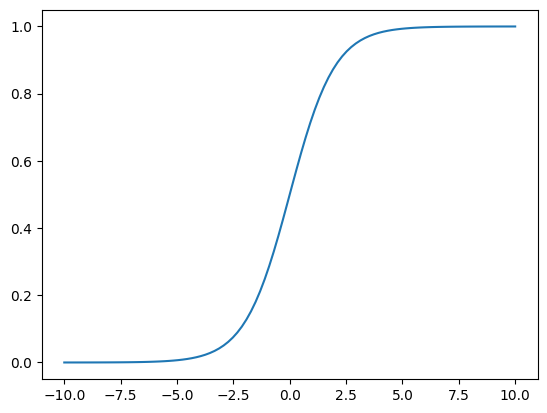

In [ ]:
# シグモイド関数のplot

x = np.linspace(-10 , 10 , 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x,z)

![](https://imgur.com/ftmcJGl.png)

シグモイド関数は、どのような$x$を入れても、  
その結果$z$は0から1の間に収まります。



回帰式$\hat{f}(x)=\theta_0+\theta_1x$をシグモイド関数の$x$に入れてみましょう。  
（参考：https://shorturl.at/bcJW2 ）

![](https://imgur.com/2GLRbJK.png)

線形回帰の結果を0～1に収めることができました。

このことを踏まえて、ロジスティック回帰の数式モデルは以下になります。

$$
p(x)=\frac{1}{1+e^{-(\theta_0+\theta_1x)}}
$$

ロジスティック回帰の結果は、そのまま確率として扱うことができます。  
特徴量が複数あっても同じです。

### 交差エントロピー

ロジスティック回帰では、先ほどの式$p(x)$におけるパラメータ$\theta$を求めることになります。

求めるためには**損失関数**が必要です。

線形回帰の時はMSEを損失関数としていました（最小二乗法）。

しかし、$p(x)$はかなり複雑な式でしたが、  
二乗をかますとさらに複雑な計算が必要になってしまいます。  


そこで、ロジスティック回帰の際は別の損失関数を使います。

ここで、損失関数の一部に  
**交差エントロピー(cross entropy)**と呼ばれる損失を使います。



データ$i$における損失を$Cost(p(x_i), y_i)$とすると、  
交差エントロピーは以下のように表されます。

$$
\begin{equation}
Cost(p(x_i), y_i)=\left\{
\begin{aligned}
-log(p(x_i)) & \qquad\text{if}\:y_i=1\\
-log(1-p(x_i)) & \qquad\text{if}\:y_i=0\\
\end{aligned}
\right.
\end{equation}
$$


#### 真の値が1の時

$y_i=1$のときの損失、$-log(p(x_i))$は以下のようなグラフになります。

（参考：https://shorturl.at/tAHUX ）

![](https://imgur.com/wq2Vs0F.png)

- $p(x_i)$は0～1の値しか取らない
- $p(x_i)=1$の時は、$y_i=1$に対しての分類結果が1になる→損失が0になる
- $p(x_i)=0$の時は、$y_i=1$に対しての分類結果が0になる→損失が$\infty$になる

#### 真の値が0の時

$y_i=0$のときの損失、$-log(1-p(x_i))$は以下のようなグラフになります。

（参考：https://shorturl.at/rDEF2 ）

![](https://imgur.com/2pXhpdT.png)

- $p(x_i)$は0～1の間の値しか取らない
- $p(x_i)=0$の時は、$y_i=0$に対しての分類結果が0になる→損失が0になる
- $p(x_i)=1$の時は、$y_i=0$に対しての分類結果が1になる→損失が$\infty$になる

#### 損失関数

交差エントロピーは、以下のように一つの式で表すこともできます。

$$
Cost(p(x_i), y_i)=-(y_ilog(p(x_i))+(1-y_i)log(1-p(x_i)))
$$

- $y_i$は0か1しか取らない
- $y_i=0$の時は、$y_ilog(p(x_i))$が0になる
- $y_i=1$の時は、$(1-y_i)log(1-p(x_i))$が0になる

この損失をすべてのデータで平均（あるいは合計）を  
取ったものが損失関数になります。

$$
L(\theta)=\frac{1}{m}\sum^{m}_{i=1}Cost(p(x_i), y_i)=-\frac{1}{m}\sum^{m}_{i=1}y_ilog(p(x_i))+(1-y_i)log(1-p(x_i))
$$

※ ここでは平均の式を損失関数とする  
※ $\theta=\theta_0, \theta_1\cdots\theta_n$

### パラメータの最適化

**最急降下法**は、最も急になる方向に少しずつパラメータを動かして最適解を探る方法です。

機械学習ではこのように、パラメータを徐々に最適解に近づけていくことを  
**「学習する」**といいます。

線形回帰のときと同様、$L(\theta)$のパラメータを以下の式で同時に更新していきます。

$$
\theta_0 := \theta_0 – \alpha\frac{\partial}{\partial\theta_0}L(\theta)
$$

$$
\theta_1 := \theta_1 – \alpha\frac{\partial}{\partial\theta_1}L(\theta)
$$

$$
・
$$
$$  
・  
$$
$$  
・  
$$

$$
\theta_n := \theta_n – \alpha\frac{\partial}{\partial\theta_n}L(\theta)
$$

微分において、一旦シグマは置いて考えます。

$$
E = -(ylog(p(x))+(1-y)log(1-p(x)))
$$

また、$p(x)$を$z$と、$\theta_0+\theta_{1}x_{1}+\dots+\theta_{n}x_{n}$を$a$と置き換えます。

以下の計算ができれば、パラメータの更新が行えそうです。

$$
\frac{\partial}{\partial\theta_n}L(\theta_n) = \frac{\partial a}{\partial \theta_n}\ \frac{\partial z}{\partial a}\ \frac{\partial E}{\partial z}
$$

#### 交差エントロピーの微分



$$
{\begin{align}
\frac{\partial E}{\partial z}\
&= \frac{\partial }{\partial z}\ \Bigl( - ( y \log z +(1-y) \log (1-z) ) \Bigr) \\
&= \frac{\partial }{\partial z}\ \Bigl( - y \log z - (1-y) \log (1-z)\Bigr) \\
&= -\frac{y}{z} + \frac{1 - y}{1 - z}
\end{align}
}
$$

#### シグモイド関数の微分

$$
{\begin{align}
\frac{\partial z}{\partial a}\
&= \frac{\partial }{\partial a}\ \Bigl(\frac{1}{1+e^{-a}} \Bigr) \\
&= -\frac{1}{(1+e^{-a})^2} \frac{\partial}{\partial a}(1+e^{-a}) \\
&= -\frac{1}{(1+e^{-a})^2} (-e^{-a}) \\
&= \frac{e^{-a}}{(1+e^{-a})^2}
\end{align}
}
$$




$$
{\begin{align}
\frac{\partial z}{\partial a}\
&= \frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}} \\
&= \frac{1}{1+e^{-a}}\frac{1+e^{-a}-1}{1+e^{-a}} \\
&= \frac{1}{1+e^{-a}}\Bigl(\frac{1+e^{-a}}{1+e^{-a}}-\frac{1}{1+e^{-a}}\Bigr) \\
&= z(1-z)
\end{align}
}
$$

#### 線形結合の微分

$$
\begin{equation}
\frac{\partial a}{\partial \theta_n}=\left\{
\begin{aligned}
x_n & \qquad\text{if}\:n≠0\\
1 & \qquad\text{if}\:n=0\\
\end{aligned}
\right.
\end{equation}
$$

#### 偏微分結果

$$
{\begin{align}
\frac{\partial}{\partial\theta_n}L(\theta_n) &= \frac{\partial a}{\partial \theta_n}\ \frac{\partial z}{\partial a}\ \frac{\partial E}{\partial z} \\
&= \frac{\partial a}{\partial \theta_n}\ z(1-z) \Bigl(-\frac{y}{z} + \frac{1 - y}{1 - z}\Bigr) \\
&= \frac{\partial a}{\partial \theta_n}\ (y(z-1)+z(1-y)) \\
&= \frac{\partial a}{\partial \theta_n}\ (z-y)
\end{align}
}
$$

よって、偏微分の結果は以下のようになります。  
（$n≠0$）

$$
\frac{\partial}{\partial\theta_0}L(\theta)=\frac{1}{m}\sum^{m}_{i=1}(p(x_i)-y_i)
$$


$$
\frac{\partial}{\partial\theta_n}L(\theta)=\frac{1}{m}\sum^{m}_{i=1}(p(x_i)-y_i)x_{in}
$$

#### 最終式

$$
\theta_0 := \theta_0 – \alpha\frac{1}{m}\sum^{m}_{i=1}(\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\dots+\theta_{n}x_{n})}}-y_i)
$$

$$
\theta_1 := \theta_1 – \alpha\frac{1}{m}\sum^{m}_{i=1}(\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\dots+\theta_{n}x_{n})}}-y_i)x_i
$$

$$
・
$$
$$  
・  
$$
$$  
・  
$$

$$
\theta_n := \theta_n – \alpha\frac{1}{m}\sum^{m}_{i=1}(\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\dots+\theta_{n}x_{n})}}-y_i)x_i
$$

### Pythonでロジスティック回帰

では、実際にPythonでロジスティック回帰を行っていきましょう。

モデルを学習する際は$\lambda$を指定する必要がありますが、  
何も指定していない場合はデフォルト値である1となります。

#### 使用するデータセット

今回は、seabornのサンプル用データセット"tips"を利用します。

データセットは、pandas.DataFrameオブジェクトとして取得することができます。

（参考サイト：[こちら](https://biotech-lab.org/articles/1408#i)）

In [ ]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


"tips"のデータの説明は以下の通りです。

- total_bill : 総支払額(食事代、税込み)　(USドル)
- tip : チップ(USドル)
- sex : 性別
- smoker : 喫煙者か否か
- day : 曜日(木・金・土・日のいずれか)
- time : 食事の時間(昼食か夕食か)
- size : 人数

また、今回のデータには欠損値はなさそうです。

#### Pythonによる実行

今回は使用するカラムを増やしたいので、one-hotエンコーディングを行います。

In [ ]:
# smoker カラム以外のカテゴリカル変数をダミー変数に変換
tips = pd.get_dummies(tips, columns=["sex", "day", "time"], drop_first=True)
tips.head()

,total_bill,tip,smoker,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,No,2,1,0,0,1,1
1,10.34,1.66,No,3,0,0,0,1,1
2,21.01,3.50,No,3,0,0,0,1,1
3,23.68,3.31,No,2,0,0,0,1,1
4,24.59,3.61,No,4,1,0,0,1,1


今回は、"smoker"カラムの値（喫煙者かどうか）を予測するとします。  

まずは、喫煙者の人数と喫煙者ではない人数を割り出しましょう。


In [ ]:
tips["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

ではロジスティック回帰を使って学習を行っていきましょう。

本当はk-fold法（参考：[こちら](https://datawokagaku.com/kfoldcv/)）を使って汎化性能を測った方がいいのですが、  
ここでは説明のしやすさのためhold-out法を使います。

In [ ]:
# 目的変数に"smoker"、説明変数にそれ以外のカラムを指定
x = tips.drop('smoker', axis=1)
y = tips['smoker']

# データを訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

それぞれのラベルの分類結果を取得したいときは、  
**`.predict(X)`**を使います。

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred[:5]

array(['No', 'No', 'No', 'No', 'Yes'], dtype=object)

それぞれのラベルの確率$p(X)$を取得したいときは、  
**`.predict_proba(X)`**を使います。

In [ ]:
y_pred_proba = model.predict_proba(x_test_scaled)
print(model.classes_)  # クラスの値
print(model.intercept_)  # 切片の値
print(y_pred_proba[:5])  # それぞれの出現確率

['No' 'Yes']
[-0.57432042]
[[6.49806389e-01 3.50193611e-01]
 [7.68504883e-01 2.31495117e-01]
 [7.36571485e-01 2.63428515e-01]
 [5.39200369e-01 4.60799631e-01]
 [6.09888628e-08 9.99999939e-01]]


ここでは、要素の一番目が"No"である確率、  
要素の二番目が"Yes"である確率、となっているようです。

係数の値を確認してみましょう。

In [ ]:
# coefficient  係数
print(pd.Series(model.coef_[0], index=x.columns))

total_bill     0.706824
tip           -0.191729
size          -0.447466
sex_Female     0.033727
day_Fri        3.959980
day_Sat        8.309546
day_Sun        7.557597
time_Dinner   -7.471234
dtype: float64


#### 交差エントロピーの導出

学習(fit)時には、学習データにおける交差エントロピーを最小にするように、  
パラメータ$\theta$を求めています。

その後、テストデータを使って交差エントロピーを求めたい場合、  
`log_loss(y_test, y_pred_proba)`を使って求めることができます。

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_proba)

0.8150017817572123

この値の値が小さければ小さいほど、優秀なモデルであると言えます。    
今回はこの数字の解釈はしません。

パラメータを変更することで精度向上が期待できます。  
パラメータについては[こちら](https://datawokagaku.com/logstic_reg_python/#i-3)が参考にしてください。